Methodology
4.1 Data Science Workflow/Framework
4.1.1. Data Collection
4.1.2 Data Preprocessing
4.1.3 Data Exploration
4.1.4 Data Modelling
4.1.5 Model Evaluation

904.jpg
inflammation on 18, 21, 20

# Read data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from utils.image import draw_polygon_mask

In [2]:
radiograph = 'tufts-dental-database/Radiographs'
segmentation = 'tufts-dental-database/Segmentation'
expert = 'tufts-dental-database/Expert'
student = 'tufts-dental-database/Student'
radiograph_images = os.listdir(radiograph)

# get csv data
expert_df = pd.read_csv(expert+'/expert_separated.csv')
student_df = pd.read_csv(student+'/student_separated.csv')
# convert type str 'polygons' to type list
expert_df['polygons'] = expert_df['polygons'].apply(lambda x: eval(x) if x is not np.nan else x)
student_df['polygons'] = student_df['polygons'].apply(lambda x: eval(x) if x is not np.nan else x)

expert_df.tail()

,External ID,Description,polygons,level_one,level_two,level_three,level_four,level_five
999,1009.JPG,Periapical radiolucency associated with tooth ...,"[[[1125, 648], [1123, 650], [1119, 650], [1118...",non-odontogenic,well_defined,radiopaque,thinning,developmental
1000,1009.JPG,Periapical radiolucency associated with tooth ...,"[[[522, 320], [522, 327], [524, 327], [524, 32...",periapical,ill_defined,mixed-septae/calcification,thinning,inflammation
1001,1012.JPG,Pericoronal radiolucencies associated with too...,"[[[1226, 499], [1224, 501], [1224, 502], [1223...",pericoronal,well_defined,radiolucent,thinning,benign_cyst_neoplasia
1002,1015.JPG,Apical inflammatory changes associated with to...,"[[[493, 562], [492, 563], [491, 563], [490, 56...",periapical,ill_defined,mixed-septae/calcification,NaN,inflammation
1003,1047.JPG,There are linear calcific flecks noted in the ...,"[[[1473, 701], [1473, 706], [1472, 707], [1472...",non-odontogenic,well_defined,radiopaque,NaN,metabolic/systemic


## Sample xray

In [9]:
img = '1009.JPG'
sample = expert_df[expert_df['External ID'] == img].iloc[0]
sample_polygon_mask = sample['polygons']
sample_radiograph = f"{radiograph}/{img}"
sample_mask = f"{expert}/mask/{img}"
sample

External ID                                             1009.JPG
Description    Periapical radiolucency associated with tooth ...
polygons       [[[595, 631], [594, 632], [591, 632], [590, 63...
level_one                                             periapical
level_two                                           well_defined
level_three                                          radiolucent
level_four                                              thinning
level_five                                 benign_cyst_neoplasia
Name: 998, dtype: object

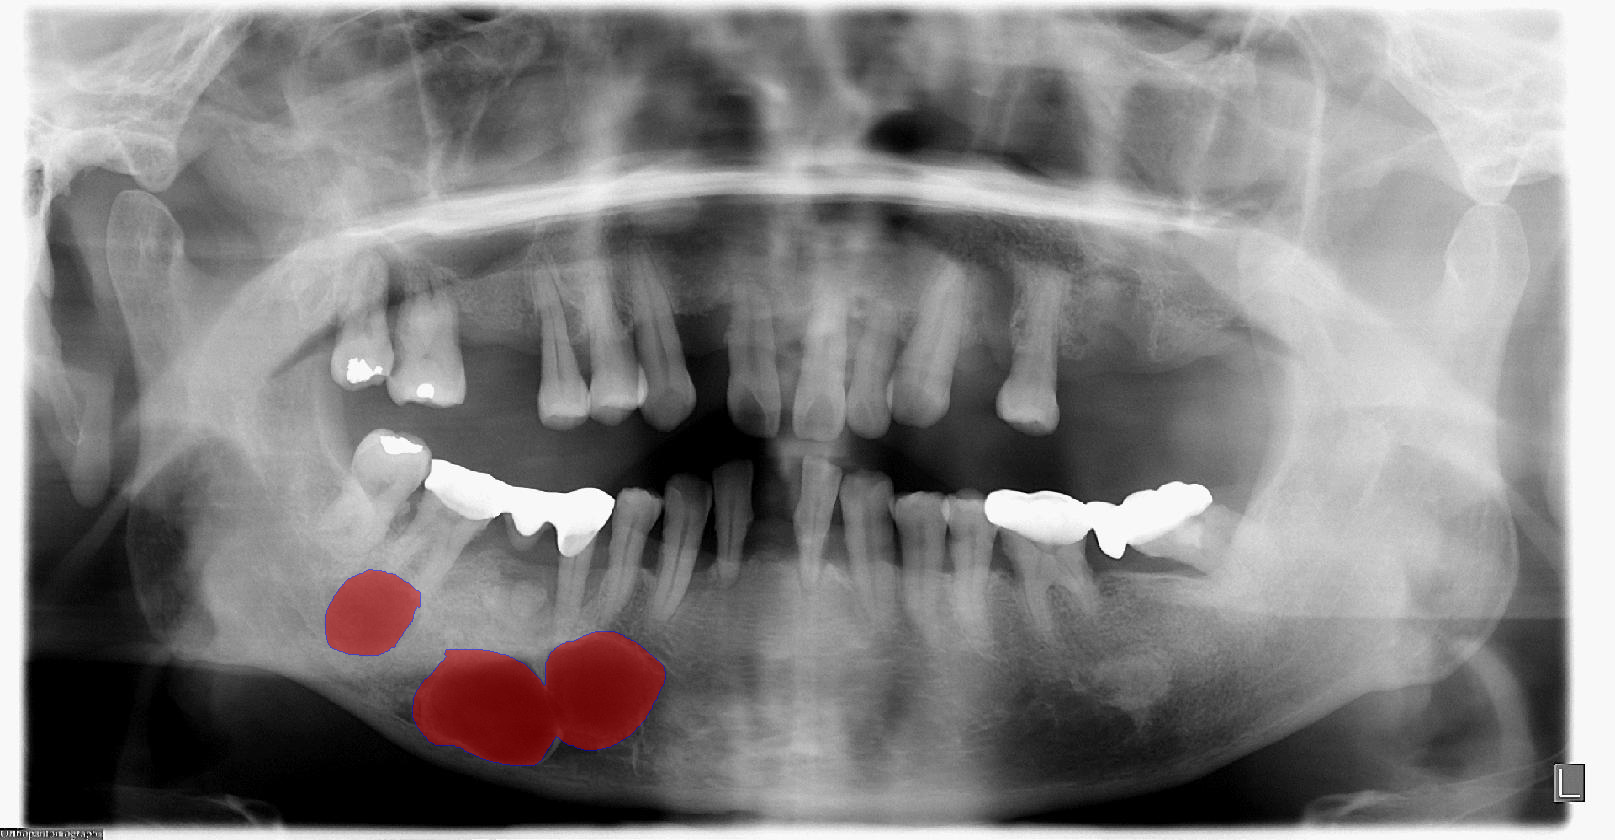

In [10]:
draw_polygon_mask(sample_polygon_mask, sample_radiograph)